In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read relevant columns to panda dataframe

# please use your own path for this
path = "./"
admission = pd.read_csv(path + 'ADMISSIONS.csv', usecols=['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME', 
                                                   'DEATHTIME', 'ADMISSION_TYPE', 'DISCHARGE_LOCATION', 'DIAGNOSIS'])
# convert admission time and discharge time death time to correct format
admission.ADMITTIME = pd.to_datetime(admission.ADMITTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
admission.DISCHTIME = pd.to_datetime(admission.DISCHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
admission.DEATHTIME = pd.to_datetime(admission.DEATHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')

In [3]:
admission[:5]

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,DISCHARGE_LOCATION,DIAGNOSIS
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaT,EMERGENCY,DISC-TRAN CANCER/CHLDRN H,BENZODIAZEPINE OVERDOSE
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaT,ELECTIVE,HOME HEALTH CARE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaT,EMERGENCY,HOME HEALTH CARE,BRAIN MASS
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaT,EMERGENCY,HOME,INTERIOR MYOCARDIAL INFARCTION
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaT,EMERGENCY,HOME,ACUTE CORONARY SYNDROME


In [4]:
# sort before group by
admission = admission.sort_values(['SUBJECT_ID','ADMITTIME'])
admission = admission.reset_index(drop = True)

# add the next admission date and type for each subject 
admission['NEXT_ADMITTIME'] = admission.groupby('SUBJECT_ID').ADMITTIME.shift(-1)
admission['NEXT_ADMISSION_TYPE'] = admission.groupby('SUBJECT_ID').ADMISSION_TYPE.shift(-1)

In [5]:
admission[:20]

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,DISCHARGE_LOCATION,DIAGNOSIS,NEXT_ADMITTIME,NEXT_ADMISSION_TYPE
0,1,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaT,NEWBORN,HOME,NEWBORN,NaT,NaN
1,2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaT,EMERGENCY,SNF,HYPOTENSION,NaT,NaN
2,3,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaT,EMERGENCY,HOME WITH HOME IV PROVIDR,"FEVER,DEHYDRATION,FAILURE TO THRIVE",NaT,NaN
3,4,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NaT,NEWBORN,HOME,NEWBORN,NaT,NaN
4,5,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaT,ELECTIVE,HOME HEALTH CARE,CHRONIC RENAL FAILURE/SDA,NaT,NaN
5,6,7,118037,2121-05-23 15:05:00,2121-05-27 11:57:00,NaT,NEWBORN,HOME,NEWBORN,NaT,NaN
6,7,8,159514,2117-11-20 10:22:00,2117-11-24 14:20:00,NaT,NEWBORN,HOME,NEWBORN,NaT,NaN
7,8,9,150750,2149-11-09 13:06:00,2149-11-14 10:15:00,2149-11-14 10:15:00,EMERGENCY,DEAD/EXPIRED,HEMORRHAGIC CVA,NaT,NaN
8,9,10,184167,2103-06-28 11:36:00,2103-07-06 12:10:00,NaT,NEWBORN,SHORT TERM HOSPITAL,NEWBORN,NaT,NaN
9,10,11,194540,2178-04-16 06:18:00,2178-05-11 19:00:00,NaT,EMERGENCY,HOME HEALTH CARE,BRAIN MASS,NaT,NaN


In [6]:
admission = admission.sort_values(['SUBJECT_ID','ADMITTIME'])
# back fill
admission[['NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']] = admission.groupby(['SUBJECT_ID'])[['NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']].fillna(method = 'bfill')

In [7]:
# compute days elapsed until next readmission
admission['DAYS_NEXT_ADMIT']=  (admission.NEXT_ADMITTIME - admission.DISCHTIME).dt.total_seconds()/(24*60*60)

In [8]:
# number of records that were readmitted in less than or equal to 30 days: 3390
records = admission[admission.DAYS_NEXT_ADMIT <= 30]
records[:10]

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,DISCHARGE_LOCATION,DIAGNOSIS,NEXT_ADMITTIME,NEXT_ADMISSION_TYPE,DAYS_NEXT_ADMIT
35,36,36,182104,2131-04-30 07:15:00,2131-05-08 14:00:00,NaT,EMERGENCY,HOME HEALTH CARE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,2131-05-12 19:49:00,EMERGENCY,4.242361
68,69,68,170467,2173-12-15 16:16:00,2174-01-03 18:30:00,NaT,EMERGENCY,HOME HEALTH CARE,PNEUMONIA,2174-01-04 22:21:00,EMERGENCY,1.160417
105,106,103,130744,2144-08-12 17:37:00,2144-08-20 11:15:00,NaT,EMERGENCY,SNF,SUBARACHNOID HEMORRHAGE,2144-08-30 23:09:00,EMERGENCY,10.495833
108,109,105,161160,2189-01-28 16:57:00,2189-02-02 16:40:00,NaT,EMERGENCY,HOME,"FEVER,ORIGIN UNKNOWN;DYSRHYTHMIA;TELEMETRY",2189-02-21 01:45:00,EMERGENCY,18.378472
117,118,109,164029,2140-01-19 13:25:00,2140-01-21 13:25:00,NaT,EMERGENCY,HOME,HYPERTENSION,2140-02-02 02:13:00,EMERGENCY,11.533333
119,120,109,193281,2140-04-07 19:51:00,2140-05-02 16:30:00,NaT,EMERGENCY,HOME HEALTH CARE,HYPERTENSIVE URGENCY,2140-05-17 14:27:00,EMERGENCY,14.914583
123,124,109,170149,2141-05-24 14:47:00,2141-06-06 19:55:00,NaT,EMERGENCY,HOME HEALTH CARE,ACUTE RENAL FAILURE,2141-06-11 10:17:00,EMERGENCY,4.598611
125,126,109,131345,2141-09-05 20:04:00,2141-09-08 18:30:00,NaT,EMERGENCY,HOME,HYPERTENSION,2141-09-11 10:12:00,EMERGENCY,2.654167
126,127,109,139061,2141-09-11 10:12:00,2141-09-14 20:00:00,NaT,EMERGENCY,HOME HEALTH CARE,HYPERTENSION,2141-09-18 10:32:00,EMERGENCY,3.605556
127,128,109,172335,2141-09-18 10:32:00,2141-09-24 13:53:00,NaT,EMERGENCY,HOME HEALTH CARE,LEG PAIN,2141-10-13 23:10:00,EMERGENCY,19.386806


In [9]:
# read the notes table 
notes = pd.read_csv(path + "NOTEEVENTS.csv")
discharge_sum = notes.loc[notes.CATEGORY == 'Discharge summary']
notes_dis_sum_last = (discharge_sum.groupby(['SUBJECT_ID','HADM_ID']).nth(-1)).reset_index()

/Users/miaor/CSE258/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
# perform a left join of the two datatable
dt_table = pd.merge(admission,notes_dis_sum_last[['SUBJECT_ID','HADM_ID','TEXT']], on = ['SUBJECT_ID','HADM_ID'],how = 'left')


In [11]:
len(dt_table)

58976

In [12]:
# check a random record in the data table 
text = dt_table.iloc[7].TEXT
# tokens = my_tokenizer(text)
# print (tokens)

In [13]:
dt_table[:5]

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,DISCHARGE_LOCATION,DIAGNOSIS,NEXT_ADMITTIME,NEXT_ADMISSION_TYPE,DAYS_NEXT_ADMIT,TEXT
0,1,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaT,NEWBORN,HOME,NEWBORN,NaT,NaN,NaN,NaN
1,2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaT,EMERGENCY,SNF,HYPOTENSION,NaT,NaN,NaN,Admission Date: [**2101-10-20**] Discharg...
2,3,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaT,EMERGENCY,HOME WITH HOME IV PROVIDR,"FEVER,DEHYDRATION,FAILURE TO THRIVE",NaT,NaN,NaN,Admission Date: [**2191-3-16**] Discharge...
3,4,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NaT,NEWBORN,HOME,NEWBORN,NaT,NaN,NaN,NaN
4,5,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaT,ELECTIVE,HOME HEALTH CARE,CHRONIC RENAL FAILURE/SDA,NaT,NaN,NaN,Admission Date: [**2175-5-30**] Dischar...


In [14]:
# filter out new born records because a lot of them don't have discharge summary
dt_table = dt_table[dt_table.ADMISSION_TYPE != 'NEWBORN']
# filter out records that do not have discharge summary

In [15]:
# add a column for label
dt_table['LABEL'] = (dt_table.DAYS_NEXT_ADMIT <= 30).astype('int')

In [16]:
# check the first 20 records in the data table 
dt_table[:20]

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,DISCHARGE_LOCATION,DIAGNOSIS,NEXT_ADMITTIME,NEXT_ADMISSION_TYPE,DAYS_NEXT_ADMIT,TEXT,LABEL
1,2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaT,EMERGENCY,SNF,HYPOTENSION,NaT,NaN,NaN,Admission Date: [**2101-10-20**] Discharg...,0
2,3,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaT,EMERGENCY,HOME WITH HOME IV PROVIDR,"FEVER,DEHYDRATION,FAILURE TO THRIVE",NaT,NaN,NaN,Admission Date: [**2191-3-16**] Discharge...,0
4,5,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaT,ELECTIVE,HOME HEALTH CARE,CHRONIC RENAL FAILURE/SDA,NaT,NaN,NaN,Admission Date: [**2175-5-30**] Dischar...,0
7,8,9,150750,2149-11-09 13:06:00,2149-11-14 10:15:00,2149-11-14 10:15:00,EMERGENCY,DEAD/EXPIRED,HEMORRHAGIC CVA,NaT,NaN,NaN,"Name: [**Known lastname 10050**], [**Known fi...",0
9,10,11,194540,2178-04-16 06:18:00,2178-05-11 19:00:00,NaT,EMERGENCY,HOME HEALTH CARE,BRAIN MASS,NaT,NaN,NaN,Admission Date: [**2178-4-16**] ...,0
10,11,12,112213,2104-08-07 10:15:00,2104-08-20 02:57:00,2104-08-20 02:57:00,ELECTIVE,DEAD/EXPIRED,PANCREATIC CANCER/SDA,NaT,NaN,NaN,Admission Date: [**2104-8-7**] Discharge ...,0
11,12,13,143045,2167-01-08 18:43:00,2167-01-15 15:15:00,NaT,EMERGENCY,HOME HEALTH CARE,CORONARY ARTERY DISEASE,NaT,NaN,NaN,"Name: [**Known lastname 9900**], [**Known fir...",0
13,14,17,194023,2134-12-27 07:15:00,2134-12-31 16:05:00,NaT,ELECTIVE,HOME HEALTH CARE,PATIENT FORAMEN OVALE\ PATENT FORAMEN OVALE MI...,2135-05-09 14:11:00,EMERGENCY,128.920833,Admission Date: [**2134-12-27**] ...,0
14,15,17,161087,2135-05-09 14:11:00,2135-05-13 14:40:00,NaT,EMERGENCY,HOME HEALTH CARE,PERICARDIAL EFFUSION,NaT,NaN,NaN,Admission Date: [**2135-5-9**] D...,0
15,16,18,188822,2167-10-02 11:18:00,2167-10-04 16:15:00,NaT,EMERGENCY,HOME,HYPOGLYCEMIA;SEIZURES,NaT,NaN,NaN,"Name: [**Known lastname 4919**] JR,[**Known f...",0


In [56]:
# split the dataset into 80% training, 10% validation, and 10% testing:
# shuffle the dataset first:
dt_table_shuffled = dt_table.sample(n=len(dt_table), random_state=42)
dt_table_shuffled = dt_table_shuffled.reset_index(drop=True)
dt_train = dt_table_shuffled.sample(frac=0.80, random_state=42)
dt_val_test = dt_table_shuffled.drop(dt_train.index)
dt_val = dt_val_test.sample(frac=0.50, random_state=42)
dt_test = dt_val_test.drop(dt_val.index)

In [57]:
# sub-sampling negative data:
posRow = dt_train.LABEL==1
dt_train_pos = dt_train.loc[posRow]
dt_train_neg = dt_train.loc[~posRow]
dt_train_sub = pd.concat([dt_train_pos, dt_train_neg.sample(n=len(dt_train_pos), random_state=42)], axis=0)
# re-shuffle sub-sampled training dataset:
dt_train_sub = dt_train_sub.sample(n=len(dt_train_sub), random_state=42).reset_index(drop=True)

In [58]:
# Data preprocessing:
# Fill missing notes with space and remove CRLF
# Tokenize free-text
import string
import nltk
from nltk import word_tokenize
def my_tokenizer(text):
    punc_list = string.punctuation + '0123456789'
    tranTable = str.maketrans(dict.fromkeys(punc_list, " "))
    text = text.lower().translate(tranTable)
    tokens = word_tokenize(text)
    return tokens

def preprocess_text(df):
    # This function preprocesses the text by filling not a number and replacing new lines ('\n') and carriage returns ('\r')
    df.TEXT = df.TEXT.fillna(' ')
#     df.TEXT = df.TEXT.str.replace('\n',' ')
#     df.TEXT = df.TEXT.str.replace('\r',' ')
    return df

print(dt_test.shape)
dt_train_sub = preprocess_text(dt_train_sub)
dt_val = preprocess_text(dt_val)
dt_test = preprocess_text(dt_test)
print (dt_test.shape)

(5111, 14)
(5111, 14)


In [59]:
# convert tokens into word vectors
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
rawCountVec = CountVectorizer(max_features=3000, tokenizer=my_tokenizer, ngram_range=(1, 2), stop_words=stop_words)
#tfidfVec = TfidfVectorizer(ngram_range=(1, 3), tokenizer=my_tokenizer, min_df=3, max_df=0.9, 
#                           strip_accents='unicode', use_idf=True, smooth_idf=True, sublinear_tf=True, stop_words=stop_words)
rawX_train = rawCountVec.fit_transform(dt_train_sub.TEXT.values)
rawX_val = rawCountVec.transform(dt_val.TEXT.values)
rawX_test = rawCountVec.transform(dt_test.TEXT.values)
#tfidftX_train = tfidfVec.fit_transform(dt_train_sub.TEXT.values)
#tfidfX_val = tfidfVec.transform(dt_val.TEXT.values)
#tfidfX_test = tfidfVec.transform(dt_test.TEXT.values)


In [60]:
print (rawX_train.shape)
print (rawX_val.shape)
print (rawX_test.shape)

(5076, 3000)
(5112, 3000)
(5111, 3000)


In [61]:
# get ground truth for training and validation dataset:
y_train = dt_train_sub.LABEL.values
y_val = dt_val.LABEL.values
y_test = dt_test.LABEL.values

Training an SVM to predict re-admission

In [66]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(rawX_train, y_train)

/Users/miaor/CSE258/venv/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [68]:
# try on validation and test set 
from sklearn.metrics import accuracy_score
y_val_pred = clf.predict(rawX_val)

In [69]:
val_acc = accuracy_score(y_val, y_val_pred)
print ("validation accuracy", val_acc)

validation accuracy 0.645735524256651


In [70]:
y_test_pred = clf.predict(rawX_test)
test_acc = accuracy_score(y_test, y_test_pred)
print ("test acuracy", test_acc)

test acuracy 0.640774799452162


Confusion matrix, without normalization
[[3063 1732]
 [ 104  212]]


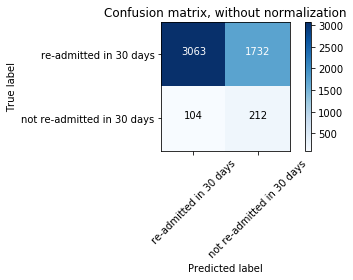

In [73]:
# confusion matrix plot 
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['re-admitted in 30 days', 'not re-admitted in 30 days'],
                      title='Confusion matrix, without normalization')

In [74]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_test_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.09


In [76]:
from sklearn.metrics import f1_score
f1_score = f1_score(y_test, y_test_pred)
print ("F1 Score", f1_score)

F1 Score 0.18761061946902655


Logistic regression to predict readmission

In [62]:
# train a baseline Logistic Regression:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.0002, class_weight='balanced', solver='lbfgs', penalty='l2', random_state=42, tol=1e-6)
# using raw count vecotrs
model.fit(rawX_train, y_train)
# using tfidf vectors
#model.fit(tfidftX_train, y_train)

LogisticRegression(C=0.0002, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=42,
          solver='lbfgs', tol=1e-06, verbose=0, warm_start=False)

In [63]:
y_pred_test = model.predict(rawX_test)

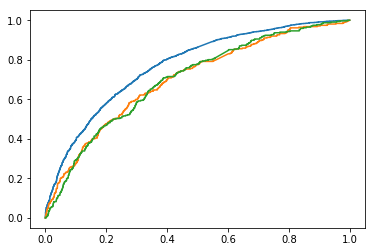

In [64]:
# Evaluation:
from sklearn.metrics import roc_curve, auc, f1_score
# using raw count vectors
y_pred_train = model.predict_proba(rawX_train)[:, 1]
y_pred_val = model.predict_proba(rawX_val)[:, 1]
y_pred_test = model.predict_proba(rawX_test)[:, 1]

# using tfidf vectors
#y_pred_train = model.predict_proba(tfidftX_train)[:, 1]
#y_pred_val = model.predict_proba(tfidfX_val)[:, 1]
#y_pred_test = model.predict_proba(tfidfX_test)[:, 1]

fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_pred_train)
fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_pred_val)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_pred_test)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_val = auc(fpr_val, tpr_val)
roc_auc_test = auc(fpr_test, tpr_test)

plt.plot(fpr_train, tpr_train, label='ROC Curve for training: (%0.2f)' % (roc_auc_train))
plt.plot(fpr_val, tpr_val, label='ROC Curve for training: (%0.2f)' % (roc_auc_val))
plt.plot(fpr_test, tpr_test, label='ROC Curve for training: (%0.2f)' % (roc_auc_test))

In [65]:
print("Training AUC is: ", roc_auc_train)
print("Validation AUC is: ", roc_auc_val)
print("Testing AUC is: ", roc_auc_test)

Training AUC is:  0.7719330479314886
Validation AUC is:  0.7005942841880342
Testing AUC is:  0.6994436451472393


In [ ]:
#print(fpr_train)
#print(tpr_train)
#print(threshold_train)